In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load datasets
df = pd.read_csv('medical_data.csv')
#df2 = pd.read_csv('train_dataset.csv')


#### Deleting the duplicated rows

In [3]:
df.drop_duplicates() # there is more 1000 duplicated row

,Patient_Number,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders,Blood_Pressure_Abnormality
0,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1,1
1,2,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0,0
2,3,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0,1
3,4,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0,0
4,5,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0,1
1996,1997,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1,1
1997,1998,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1,1
1998,1999,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1,0


## **Handling Missing Values**

In [4]:
# displaying first 5 rows
df.head()

,Patient_Number,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders,Blood_Pressure_Abnormality
0,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1,1
1,2,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0,0
2,3,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0,1
3,4,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0,0
4,5,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0,1


In [5]:
# Understanding data types and number of non-null rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Level_of_Hemoglobin            2000 non-null   float64
 2   Genetic_Pedigree_Coefficient   1908 non-null   float64
 3   Age                            2000 non-null   int64  
 4   BMI                            2000 non-null   int64  
 5   Sex                            2000 non-null   int64  
 6   Pregnancy                      442 non-null    float64
 7   Smoking                        2000 non-null   int64  
 8   Physical_activity              2000 non-null   int64  
 9   salt_content_in_the_diet       2000 non-null   int64  
 10  alcohol_consumption_per_day    1758 non-null   float64
 11  Level_of_Stress                2000 non-null   int64  
 12  Chronic_kidney_disease         2000 non-null   i

In [6]:
df.isna().sum()

Patient_Number                      0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
Blood_Pressure_Abnormality          0
dtype: int64

In [7]:
df['Genetic_Pedigree_Coefficient'] = df['Genetic_Pedigree_Coefficient'].fillna(df['Genetic_Pedigree_Coefficient'].median())
df['alcohol_consumption_per_day'] = df['alcohol_consumption_per_day'].fillna(df['alcohol_consumption_per_day'].mean())


In [8]:
df = df.drop('Pregnancy', axis=1)

In [9]:
df.isna().sum()

Patient_Number                   0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
Blood_Pressure_Abnormality       0
dtype: int64

### **Splitting Data**

In [10]:
from imblearn.over_sampling import BorderlineSMOTE
# Split the data into features (X) and target (y)
X = df.drop('Blood_Pressure_Abnormality', axis=1)
y = df['Blood_Pressure_Abnormality']

smote = BorderlineSMOTE(random_state = 42, kind = 'borderline-2')
X_smote, y_smote = smote.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

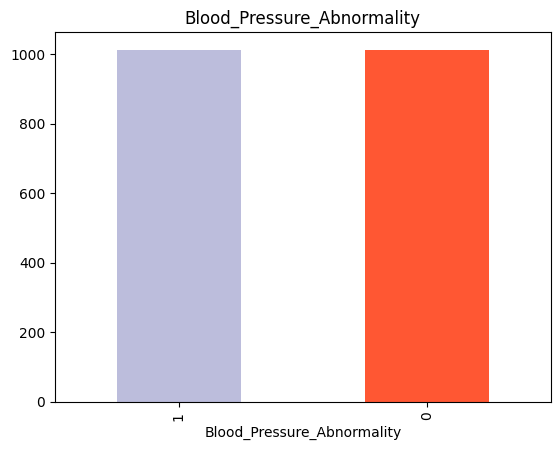

In [11]:
y_smote.value_counts().plot(kind = 'bar', color = ["#bcbddc", "#FF5733"])
plt.title("Blood_Pressure_Abnormality")
plt.show()

# **TRAINING Random Forest Model**

In [12]:
# Define the RandomForestClassifier with the best hyperparameters
rf = RandomForestClassifier(bootstrap=True,max_depth=None,min_samples_leaf=2,min_samples_split=2,n_estimators=200
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate metrics
rf_accuracy = round(accuracy_score(y_test, y_pred), 3)
rf_precision = round(precision_score(y_test, y_pred, average='weighted'), 3)
rf_recall = round(recall_score(y_test, y_pred, average='weighted'), 3)
rf_f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)

# Printing classification results
print("Random Forest Classification Results with Best Hyperparameters:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1-Score: {rf_f1}")

# Storing results in a dict
rf_results = {
    'Model': 'Random Forest with Best Hyperparameters',
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1-Score': rf_f1,
    'Best Hyperparameters': {
        'bootstrap': True,
        'max_depth': None,
        'min_samples_leaf': 2,
        'min_samples_split': 2,
        'n_estimators': 200
    }
}



Random Forest Classification Results with Best Hyperparameters:
Accuracy: 0.892
Precision: 0.893
Recall: 0.892
F1-Score: 0.892


In [13]:
# Define the XGBoost model with the best hyperparameters
xgb_model = xgb.XGBClassifier(subsample=0.8,reg_lambda=0.2,reg_alpha=0.1,n_estimators=300,max_depth=7,learning_rate=0.1,gamma=0.4,colsample_bytree=1.0
)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions with the model
y_pred_xgb = xgb_model.predict(X_test)

# Calculate metrics
xgb_accuracy = round(accuracy_score(y_test, y_pred_xgb), 3)
xgb_precision = round(precision_score(y_test, y_pred_xgb, average='weighted', zero_division=1), 3)
xgb_recall = round(recall_score(y_test, y_pred_xgb, average='weighted'), 3)
xgb_f1 = round(f1_score(y_test, y_pred_xgb, average='weighted'), 3)

# Print classification results
print("XGBoost Classification Results with Best Hyperparameters:")
print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1-Score: {xgb_f1}")

# Store results in a dictionary for later comparison
xgb_results = {
    'Model': 'XGBoost with Best Hyperparameters',
    'Accuracy': xgb_accuracy,
    'Precision': xgb_precision,
    'Recall': xgb_recall,
    'F1-Score': xgb_f1
}


XGBoost Classification Results with Best Hyperparameters:
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1-Score: 0.89


C:\Users\hp\AppData\Local\Temp\ipykernel_8596\563040153.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='Blues_d')


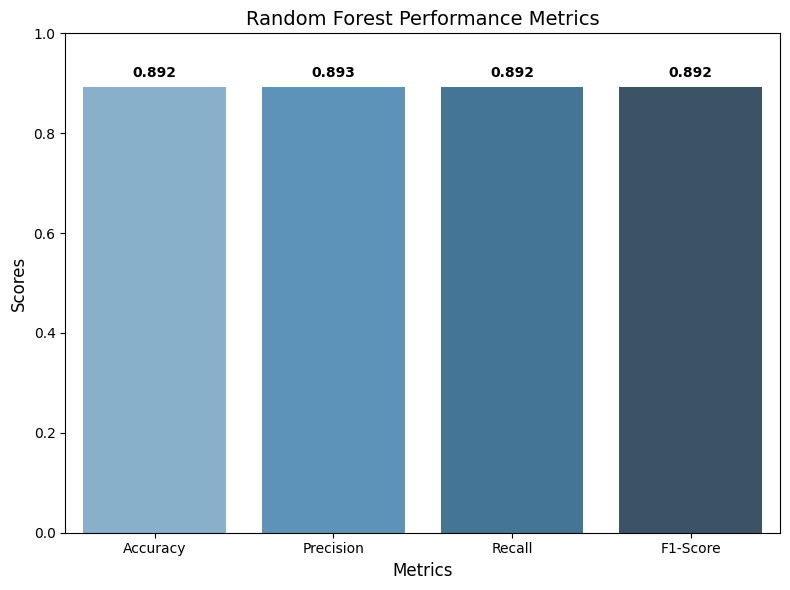

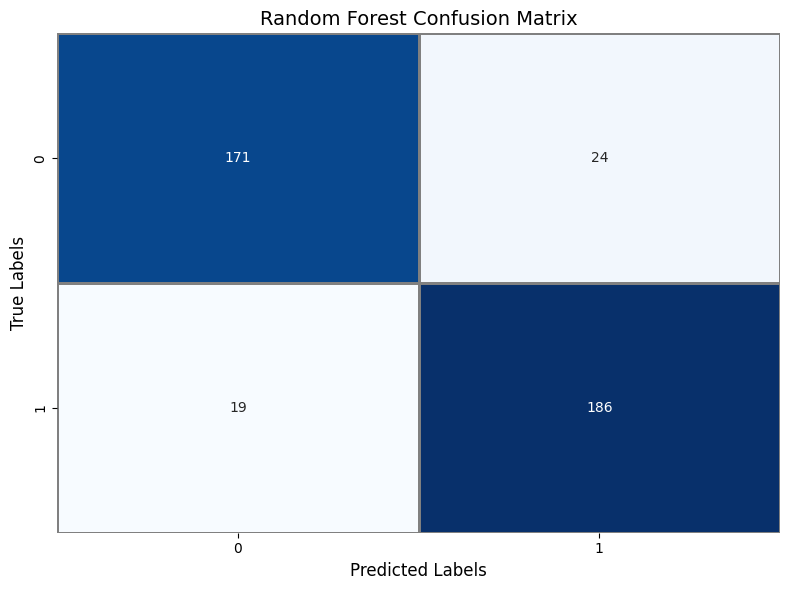

In [14]:
# Bar plot for Accuracy, Precision, Recall, F1-Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [rf_accuracy, rf_precision, rf_recall, rf_f1]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values, palette='Blues_d')
plt.title('Random Forest Performance Metrics', fontsize=14)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.ylim(0, 1)  # Set y-axis to be between 0 and 1
for i, value in enumerate(values):
    plt.text(i, value + 0.02, f'{value:.3f}', ha='center', color='black', fontweight='bold')
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False, linewidths=1, linecolor="gray",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Random Forest Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.tight_layout()
plt.show()


In [15]:
# prediction
print(rf.predict([X_test.iloc[0]]))
print(rf.predict([X_test.iloc[20]]))

c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[1]
[0]


c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [16]:
print(X_test.iloc[0])

Patient_Number                     728.00
Level_of_Hemoglobin                 14.77
Genetic_Pedigree_Coefficient         0.20
Age                                 34.00
BMI                                 22.00
Sex                                  0.00
Smoking                              1.00
Physical_activity                43348.00
salt_content_in_the_diet          7153.00
alcohol_consumption_per_day        140.00
Level_of_Stress                      3.00
Chronic_kidney_disease               0.00
Adrenal_and_thyroid_disorders        1.00
Name: 727, dtype: float64


In [17]:
print(X_test.iloc[20])

Patient_Number                    1251.00
Level_of_Hemoglobin                 10.06
Genetic_Pedigree_Coefficient         0.55
Age                                 62.00
BMI                                 37.00
Sex                                  1.00
Smoking                              1.00
Physical_activity                35397.00
salt_content_in_the_diet         43475.00
alcohol_consumption_per_day        293.00
Level_of_Stress                      1.00
Chronic_kidney_disease               0.00
Adrenal_and_thyroid_disorders        0.00
Name: 1250, dtype: float64


### **Pickling for Deployment**

In [18]:
import pickle

In [19]:
# Save the trained RandomForest model to a .pkl file
pickle.dump(rf, open('classifyModel.pkl', 'wb'))


In [20]:
pickled_model = pickle.load(open('classifyModel.pkl','rb'))

In [21]:
print(pickled_model.predict([X_test.iloc[0]]))

[1]


c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
